In [10]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [11]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [12]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [13]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count.
len(cities)

632

In [14]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [15]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5c6f0c38edaaa89d7869bd309b6e8178


In [17]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [18]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [19]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        print(city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date}))

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | namatanai
None
Processing Record 2 of Set 1 | saskylakh
None
Processing Record 3 of Set 1 | camacari
None
Processing Record 4 of Set 1 | ushuaia
None
Processing Record 5 of Set 1 | fortuna
None
Processing Record 6 of Set 1 | komsomolskiy
None
Processing Record 7 of Set 1 | yellowknife
None
Processing Record 8 of Set 1 | port alfred
None
Processing Record 9 of Set 1 | castro
None
Processing Record 10 of Set 1 | lolua
City not found. Skipping...
Processing Record 11 of Set 1 | busselton
None
Processing Record 12 of Set 1 | hobart
None
Processing Record 13 of Set 1 | boende
None
Processing Record 14 of Set 1 | atuona
None
Processing Record 15 of Set 1 | mataura
None
Processing Record 16 of Set 1 | new norfolk
None
Processing Record 17 of Set 1 | tazovskiy
None
Processing Record 18 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 19 of Set 1 | bengkulu
None
Processing Record 20 of Set 1 | port hardy
None
Processing Record 21 of Set 1 | b

KeyboardInterrupt: 

In [20]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Namatanai,-3.6667,152.4333,84.04,69,100,7.25,PG,2022-02-01 01:37:06
1,Saskylakh,71.9167,114.0833,-28.91,100,66,2.19,RU,2022-02-01 01:37:06
2,Camacari,-12.6975,-38.3242,82.17,86,0,4.92,BR,2022-02-01 01:37:07
3,Ushuaia,-54.8000,-68.3000,40.66,87,75,17.27,AR,2022-02-01 01:36:21
4,Fortuna,40.5982,-124.1573,48.54,78,75,1.99,US,2022-02-01 01:37:07
5,Komsomolskiy,40.4272,71.7189,27.82,86,71,0.00,UZ,2022-02-01 01:37:07
6,Yellowknife,62.4560,-114.3525,-11.58,83,20,6.91,CA,2022-02-01 01:37:08
7,Port Alfred,-33.5906,26.8910,74.64,97,99,2.71,ZA,2022-02-01 01:36:18
8,Castro,-24.7911,-50.0119,62.67,90,1,2.55,BR,2022-02-01 01:37:08
9,Busselton,-33.6500,115.3333,69.08,39,0,16.35,AU,2022-02-01 01:37:09


In [21]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [22]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [25]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'01/31/22'

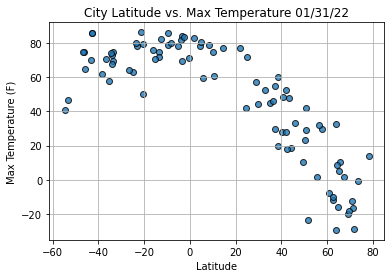

In [26]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

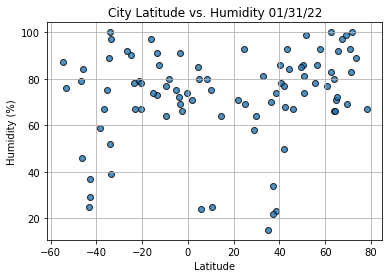

In [27]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

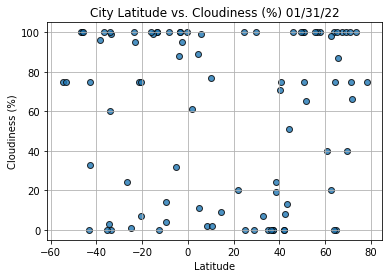

In [28]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

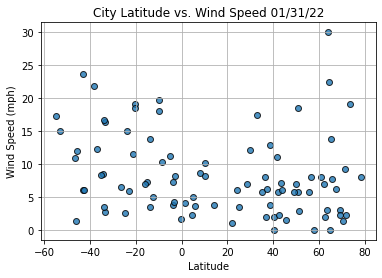

In [29]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()